In [8]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets,transforms
from torch import nn,optim

In [9]:
transform = transforms.ToTensor() #definindo a conversão de imagem para tensor

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True,transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # Cria um b

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform) #
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True) # Cria um buffe

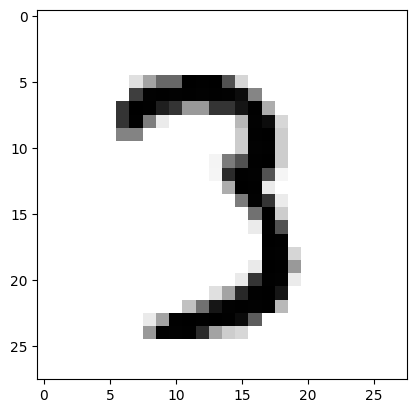

In [10]:
dataiter = iter(trainloader)
imagens,etiquetas = dataiter.__next__()
plt.imshow(imagens[0].numpy().squeeze(),cmap='gray_r');

In [11]:
print(imagens[0].shape)
print(etiquetas[0].shape)

torch.Size([1, 28, 28])
torch.Size([])


In [12]:
class Modelo(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784,128)
        self.fc2 = nn.Linear(128,64)
        self.fc3 = nn.Linear(64,10)
        
    def forward(self,x):        
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return F.log_softmax(x,dim=1)